In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Correlation between affordable rental units and violations
# rows all unique
affordable_df = pd.read_csv("../data/affordable_rental_units.csv")
affordable_df['Location'] = affordable_df['Location'].str.lower()
affordable_df.head(5)  

,Location,"Building Address (click below for property website, where available)",For Current Vacancies and More Information,Number of Units Tracked,Bedroom Sizes,AMI Categories
0,allston,8 Griggs Street,The Mount Vernon Company: 617.267.0006,2.0,1BR,80-100%; 100%
1,allston,31 North Beacon Street,Carol Fiore: cfiore@78clean.com,3.0,"Studio, 1BR, 2BR",70%
2,allston,40 Malvern Street,40Malvern@maloneyproperties.com,6.0,"1BR, 2BR",70%
3,allston,450 Cambridge Street,Maloney Properties: 617.209.5406 450Cambridge@...,5.0,"1BR, 2BR",70%
4,allston,1505\nCommonwealth Avenue,LBC Boston: 617.599.7261,10.0,"Studio, 1BR, 2BR",70%


In [3]:
total_units = affordable_df['Number of Units Tracked'].sum()
print(f"Total number of affordable rental units tracked: {total_units}")

Total number of affordable rental units tracked: 1984.0


In [4]:
top_neighborhoods = affordable_df.groupby('Location')['Number of Units Tracked'].sum().nlargest(5)
print("Top 5 neighborhoods with the highest number of units tracked:")
print(top_neighborhoods)

Top 5 neighborhoods with the highest number of units tracked:
Location
fenway       284.0
seaport      246.0
downtown     192.0
south end    145.0
allston      132.0
Name: Number of Units Tracked, dtype: float64


In [5]:
total_units_per_neighborhood = affordable_df.groupby('Location')['Number of Units Tracked'].sum()
affordable_units = pd.DataFrame(total_units_per_neighborhood)
affordable_units

,Number of Units Tracked
Location,
allston,132.0
back bay,90.0
brighton,106.0
charlestown,102.0
dorchester,81.0
downtown,192.0
east boston,103.0
fenway,284.0
fort point,67.0


In [10]:
cities_df = pd.read_csv("../data/cities_df.csv", index_col=0)
cities_df

,Location,Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total
1,dorchester,29.0,3.0,41.0,32.0,0.0,1.0,7.0,181.0,294.0
0,boston,30.0,1.0,45.0,40.0,0.0,0.0,2.0,121.0,239.0
2,roxbury,15.0,0.0,17.0,12.0,0.0,0.0,1.0,43.0,88.0
4,mattapan,10.0,0.0,10.0,5.0,1.0,0.0,4.0,33.0,63.0
3,jamaicaplain,10.0,1.0,14.0,7.0,0.0,0.0,3.0,27.0,62.0
...,...,...,...,...,...,...,...,...,...,...
101,soouthboston,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
102,dorchster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
103,highlandbeach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
104,knghtdale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [11]:
merge_df = pd.merge(affordable_units, cities_df, on='Location', how='inner')
merge_df = merge_df.rename(columns={'Total': 'Total Violations'})
merge_df

,Location,Number of Units Tracked,Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total Violations
0,allston,132.0,1.0,0.0,2.0,5.0,0.0,0.0,1.0,14.0,23.0
1,brighton,106.0,2.0,0.0,3.0,8.0,0.0,0.0,0.0,19.0,32.0
2,charlestown,102.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,7.0
3,dorchester,81.0,29.0,3.0,41.0,32.0,0.0,1.0,7.0,181.0,294.0
4,roslindale,6.0,4.0,0.0,3.0,5.0,0.0,0.0,1.0,17.0,30.0
5,roxbury,92.0,15.0,0.0,17.0,12.0,0.0,0.0,1.0,43.0,88.0


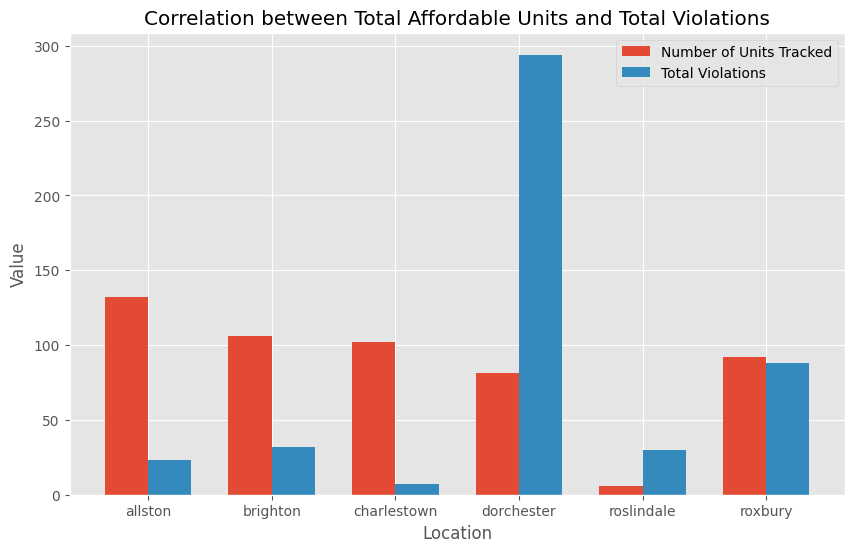

In [12]:
import numpy as np
# visualization
# Set the style for the plot
plt.style.use('ggplot')

bar_width = 0.35

# Create the x values
locations = np.arange(len(merge_df['Location']))

# # Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(locations - bar_width/2, merge_df['Number of Units Tracked'], bar_width, label='Number of Units Tracked')
bar2 = ax.bar(locations + bar_width/2, merge_df['Total Violations'], bar_width, label='Total Violations')

# Set labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Value')
ax.set_title('Correlation between Total Affordable Units and Total Violations')
ax.set_xticks(locations)
ax.set_xticklabels(merge_df['Location'])
ax.legend()

# Display the plot
plt.show()